# **Project Title: AI Plant Doctor 🌿 – Plant Disease Detection System**

**Team Members:**
  - Frehiwot Haile
  - KhineMoe Nwe
  - Jin Zhao

**Project Description:**

This project implements an AI-powered plant disease detection system using
deep learning and computer vision. The model is trained on 38 plant disease
classes from the PlantVillage dataset and uses a transfer learning approach
with a custom classification head.

**The system performs:**

  - Image-based plant disease classification
  - Confidence scoring of predictions
  - Top-3 evaluation for better prediction quality
  - Visualization of training/validation performance
  - Deployment through a Streamlit web application


**Goal:**

To provide farmers, gardeners, and students with an accessible tool to identify
plant diseases early and take appropriate action to protect crops and improve
plant health.

Date: November 2025

In [1]:
# CORRECT IMPORTS FOR YOUR PROJECT
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import os
import json

# GPU Setup
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPU ready!")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# List the project folder
%ls '/content/drive/MyDrive/ML_AI_Project/data/PlanVillageDataset/'

 Apple___Apple_scab/
 Apple___Black_rot/
 Apple___Cedar_apple_rust/
 Apple___healthy/
 Blueberry___healthy/
'Cherry_(including_sour)___healthy'/
'Cherry_(including_sour)___Powdery_mildew'/
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'/
'Corn_(maize)___Common_rust_'/
'Corn_(maize)___healthy'/
'Corn_(maize)___Northern_Leaf_Blight'/
 Grape___Black_rot/
'Grape___Esca_(Black_Measles)'/
 Grape___healthy/
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'/
'Orange___Haunglongbing_(Citrus_greening)'/
 Peach___Bacterial_spot/
 Peach___healthy/
 Pepper,_bell___Bacterial_spot/
 Pepper,_bell___healthy/
 Potato___Early_blight/
 Potato___healthy/
 Potato___Late_blight/
 Raspberry___healthy/
 Soybean___healthy/
 Squash___Powdery_mildew/
 Strawberry___healthy/
 Strawberry___Leaf_scorch/
 Tomato___Bacterial_spot/
 Tomato___Early_blight/
 Tomato___healthy/
 Tomato___Late_blight/
 Tomato___Leaf_Mold/
 Tomato___Septoria_leaf_spot/
'Tomato___Spider_mites Two-spotted_spider_mite'/
 Tomato___Target_Spot/
 T

**Purpose:** list all immediate subfolders (classes) in PlantVillageDataset and print the total count.

**Action:** update dataset_path if needed; folders usually map to Plant___Disease classes.

In [4]:
# List all folders from PlantVillageDataset folder
import os
dataset_path = '/content/drive/MyDrive/ML_AI_Project/data/PlanVillageDataset/'
# list all folders
# folders = os.listdir(dataset_path)
# print(folders)

# alternative way to list the folders
folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
print("Found folders:")
for folder in folders:
    print("-", folder)
# Count the total number of folders
print(f"\nTotal Number of folders:{len(folders)}")

Found folders:
- Apple___Cedar_apple_rust
- Apple___Apple_scab
- Blueberry___healthy
- Cherry_(including_sour)___healthy
- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
- Corn_(maize)___Common_rust_
- Corn_(maize)___healthy
- Cherry_(including_sour)___Powdery_mildew
- Apple___Black_rot
- Apple___healthy
- Corn_(maize)___Northern_Leaf_Blight
- Grape___healthy
- Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
- Grape___Esca_(Black_Measles)
- Orange___Haunglongbing_(Citrus_greening)
- Grape___Black_rot
- Peach___healthy
- Peach___Bacterial_spot
- Pepper,_bell___healthy
- Pepper,_bell___Bacterial_spot
- Potato___Early_blight
- Potato___Late_blight
- Raspberry___healthy
- Potato___healthy
- Squash___Powdery_mildew
- Soybean___healthy
- Tomato___Early_blight
- Strawberry___healthy
- Strawberry___Leaf_scorch
- Tomato___Bacterial_spot
- Tomato___Late_blight
- Tomato___healthy
- Tomato___Leaf_Mold
- Tomato___Tomato_mosaic_virus
- Tomato___Septoria_leaf_spot
- Tomato___Tomato_Yellow_Leaf_Curl_Vi

**Purpose:** For each immediate subfolder in dataset_path (e.g., each class), count how many files it contains and print the grand total. **Notes:** Update dataset_path if needed. Counts only files in the first level (no recursion).

In [5]:
# Count the number of files in each subfolder and total files in all subfolders
total_files = 0

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"Folder '{folder}': {num_files} files")
        total_files += num_files

print(f"\nTotal number of files in all subfolders: {total_files}")

Folder 'Apple___Cedar_apple_rust': 275 files
Folder 'Apple___Apple_scab': 630 files
Folder 'Blueberry___healthy': 1502 files
Folder 'Cherry_(including_sour)___healthy': 854 files
Folder 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 513 files
Folder 'Corn_(maize)___Common_rust_': 1192 files
Folder 'Corn_(maize)___healthy': 1162 files
Folder 'Cherry_(including_sour)___Powdery_mildew': 1052 files
Folder 'Apple___Black_rot': 621 files
Folder 'Apple___healthy': 1645 files
Folder 'Corn_(maize)___Northern_Leaf_Blight': 985 files
Folder 'Grape___healthy': 423 files
Folder 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076 files
Folder 'Grape___Esca_(Black_Measles)': 1383 files
Folder 'Orange___Haunglongbing_(Citrus_greening)': 5507 files
Folder 'Grape___Black_rot': 1180 files
Folder 'Peach___healthy': 360 files
Folder 'Peach___Bacterial_spot': 2297 files
Folder 'Pepper,_bell___healthy': 1478 files
Folder 'Pepper,_bell___Bacterial_spot': 997 files
Folder 'Potato___Early_blight': 1000 fi

## **Purpose:** Build a dataframe of all disease folders under dataset_path with the number of images in each folder.

**Notes:** Counts only first-level files (no recursion). Update dataset_path if needed.

**Output:** df_diseases with columns: disease_name, count_images.

In [6]:
# Create a disease dataframe
import pandas as pd
import os

total_diseases = []
# Iterate over the list of folder names
for disease_name in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, disease_name)
  # Check the folder_path whether is it directory folder or not
  if os.path.isdir(folder_path):
    disease_name_count = {}
    count_disease = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    disease_name_count['disease_name'] = disease_name
    disease_name_count['count_images'] = count_disease
    total_diseases.append(disease_name_count)

df_diseases = pd.DataFrame(total_diseases)
display(df_diseases)


,disease_name,count_images
0,Apple___Cedar_apple_rust,275
1,Apple___Apple_scab,630
2,Blueberry___healthy,1502
3,Cherry_(including_sour)___healthy,854
4,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,513
5,Corn_(maize)___Common_rust_,1192
6,Corn_(maize)___healthy,1162
7,Cherry_(including_sour)___Powdery_mildew,1052
8,Apple___Black_rot,621
9,Apple___healthy,1645


In [7]:
# Check null in the dataframe
df_diseases.isnull().sum()

,0
disease_name,0
count_images,0


In [8]:
df_diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   disease_name  38 non-null     object
 1   count_images  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 740.0+ bytes


Quality check prior to training. We profile the dataset by class to identify integrity issues. The routine counts images per class and detects zero-byte files, reporting the absolute count and percentage. Classes with elevated zero-byte rates are flagged for remediation (file replacement/removal) before model fitting.

In [9]:
from pathlib import Path
from collections import defaultdict
import pandas as pd

TRAIN_DIR = Path(dataset_path)
assert TRAIN_DIR.exists(), f"Path not found: {TRAIN_DIR}"

# Consider common image extensions only (avoids counting stray files)
exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp'}

# 1) Count total images per class (non-recursive; assumes structure: root/<class>/<files>)
totals = {}
for d in TRAIN_DIR.iterdir():
    if d.is_dir():
        totals[d.name] = sum(
            1 for p in d.iterdir()
            if p.is_file() and p.suffix.lower() in exts
        )

# 2) Count zero-byte images per class (recursive)
zero_by_class = defaultdict(int)
zero_file_paths = []
for p in TRAIN_DIR.rglob("*"):
    if p.is_file() and p.suffix.lower() in exts and p.stat().st_size == 0:
        zero_by_class[p.parent.name] += 1
        zero_file_paths.append(p)

# 3) Build a tidy DataFrame for EDA
df = (
    pd.DataFrame({
        "class": list(totals.keys()),
        "total": list(totals.values())
    })
    .assign(
        zero=lambda d: d["class"].map(zero_by_class).fillna(0).astype(int),
        pct_zero=lambda d: (d["zero"] / d["total"]).fillna(0) * 100
    )
    .sort_values(["zero", "pct_zero", "total"], ascending=[False, False, True])
    .reset_index(drop=True)
)

# Show top rows; in Colab this renders as a nice table
df.head(20)


,class,total,zero,pct_zero
0,Potato___healthy,152,0,0.0
1,Apple___Cedar_apple_rust,275,0,0.0
2,Peach___healthy,360,0,0.0
3,Raspberry___healthy,371,0,0.0
4,Tomato___Tomato_mosaic_virus,373,0,0.0
5,Grape___healthy,423,0,0.0
6,Strawberry___healthy,456,0,0.0
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,513,0,0.0
8,Apple___Black_rot,621,0,0.0
9,Apple___Apple_scab,630,0,0.0


 **Counts per disease class.**
This cell walks each subfolder under dataset_path (one folder = one disease class) and prints the number of image files it contains. Use it to quickly detect empty folders and class imbalance before training. It does not compute file sizes.

In [10]:
# Per-class file counts:
# For each disease subfolder in dataset_path, print how many image files it contains.
# Use to find empty/small classes and assess imbalance. (Counts files; does NOT check sizes.)
for disease_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, disease_name)
    if os.path.isdir(folder_path):
        total_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"Folder '{disease_name}': {total_files} files")


Folder 'Apple___Cedar_apple_rust': 275 files
Folder 'Apple___Apple_scab': 630 files
Folder 'Blueberry___healthy': 1502 files
Folder 'Cherry_(including_sour)___healthy': 854 files
Folder 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 513 files
Folder 'Corn_(maize)___Common_rust_': 1192 files
Folder 'Corn_(maize)___healthy': 1162 files
Folder 'Cherry_(including_sour)___Powdery_mildew': 1052 files
Folder 'Apple___Black_rot': 621 files
Folder 'Apple___healthy': 1645 files
Folder 'Corn_(maize)___Northern_Leaf_Blight': 985 files
Folder 'Grape___healthy': 423 files
Folder 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076 files
Folder 'Grape___Esca_(Black_Measles)': 1383 files
Folder 'Orange___Haunglongbing_(Citrus_greening)': 5507 files
Folder 'Grape___Black_rot': 1180 files
Folder 'Peach___healthy': 360 files
Folder 'Peach___Bacterial_spot': 2297 files
Folder 'Pepper,_bell___healthy': 1478 files
Folder 'Pepper,_bell___Bacterial_spot': 997 files
Folder 'Potato___Early_blight': 1000 fi

**Class counts — tidy view & summary.**
This cell converts raw per-class counts into a pandas table, displays the largest and smallest classes, and prints descriptive stats plus an imbalance ratio (max/min). Use this to spot severe skew and decide on fixes like class weights, stratified splits, or oversampling.

In [11]:
from pathlib import Path
import pandas as pd

root = Path(dataset_path)
exts = {'.jpg','.jpeg','.png','.bmp','.tif','.tiff','.webp'}

rows = []
for d in root.iterdir():
    if d.is_dir():
        n = sum(1 for p in d.iterdir() if p.is_file() and p.suffix.lower() in exts)
        rows.append({"class": d.name, "count": n})

df_counts = pd.DataFrame(rows).sort_values("count", ascending=False).reset_index(drop=True)
display(df_counts.head(10))   # top-10 biggest classes
display(df_counts.tail(10))   # bottom-10 smallest classes

print("\nSummary:")
print(df_counts["count"].describe())   # min/median/mean/max
imbalance_ratio = df_counts["count"].max() / max(1, df_counts["count"].min())
print(f"Imbalance ratio (max/min): {imbalance_ratio:.1f}x")


,class,count
0,Orange___Haunglongbing_(Citrus_greening),5507
1,Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357
2,Soybean___healthy,5090
3,Peach___Bacterial_spot,2297
4,Tomato___Bacterial_spot,2127
5,Tomato___Late_blight,1909
6,Squash___Powdery_mildew,1835
7,Tomato___Septoria_leaf_spot,1771
8,Tomato___Spider_mites Two-spotted_spider_mite,1676
9,Apple___healthy,1645


,class,count
28,Apple___Apple_scab,630
29,Apple___Black_rot,621
30,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,513
31,Strawberry___healthy,456
32,Grape___healthy,423
33,Tomato___Tomato_mosaic_virus,373
34,Raspberry___healthy,371
35,Peach___healthy,360
36,Apple___Cedar_apple_rust,275
37,Potato___healthy,152



Summary:
count      38.000000
mean     1429.078947
std      1271.738784
min       152.000000
25%       686.000000
50%      1092.500000
75%      1631.500000
max      5507.000000
Name: count, dtype: float64
Imbalance ratio (max/min): 36.2x


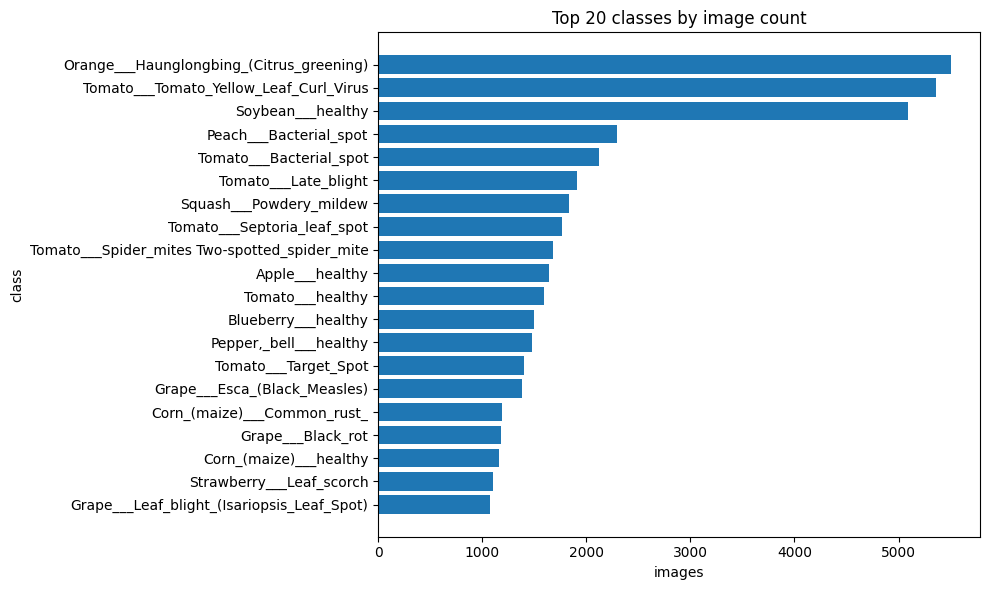

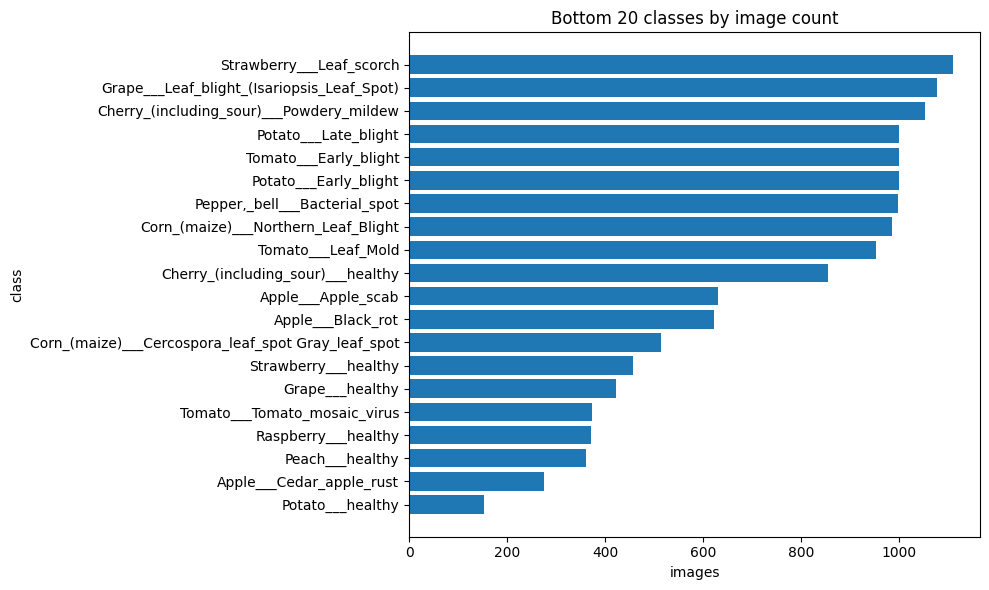

In [12]:
import matplotlib.pyplot as plt

top = df_counts.head(20).sort_values("count")
plt.figure(figsize=(10,6))
plt.barh(top["class"], top["count"])
plt.title("Top 20 classes by image count")
plt.xlabel("images"); plt.ylabel("class")
plt.tight_layout(); plt.show()

bottom = df_counts.tail(20).sort_values("count")
plt.figure(figsize=(10,6))
plt.barh(bottom["class"], bottom["count"])
plt.title("Bottom 20 classes by image count")
plt.xlabel("images"); plt.ylabel("class")
plt.tight_layout(); plt.show()

**Per-plant class distribution:** top-k diseases per plant with a shared x-axis, annotated counts (and % within plant). This documents intra-plant imbalance that we’ll correct with class weights/stratified splits during training.

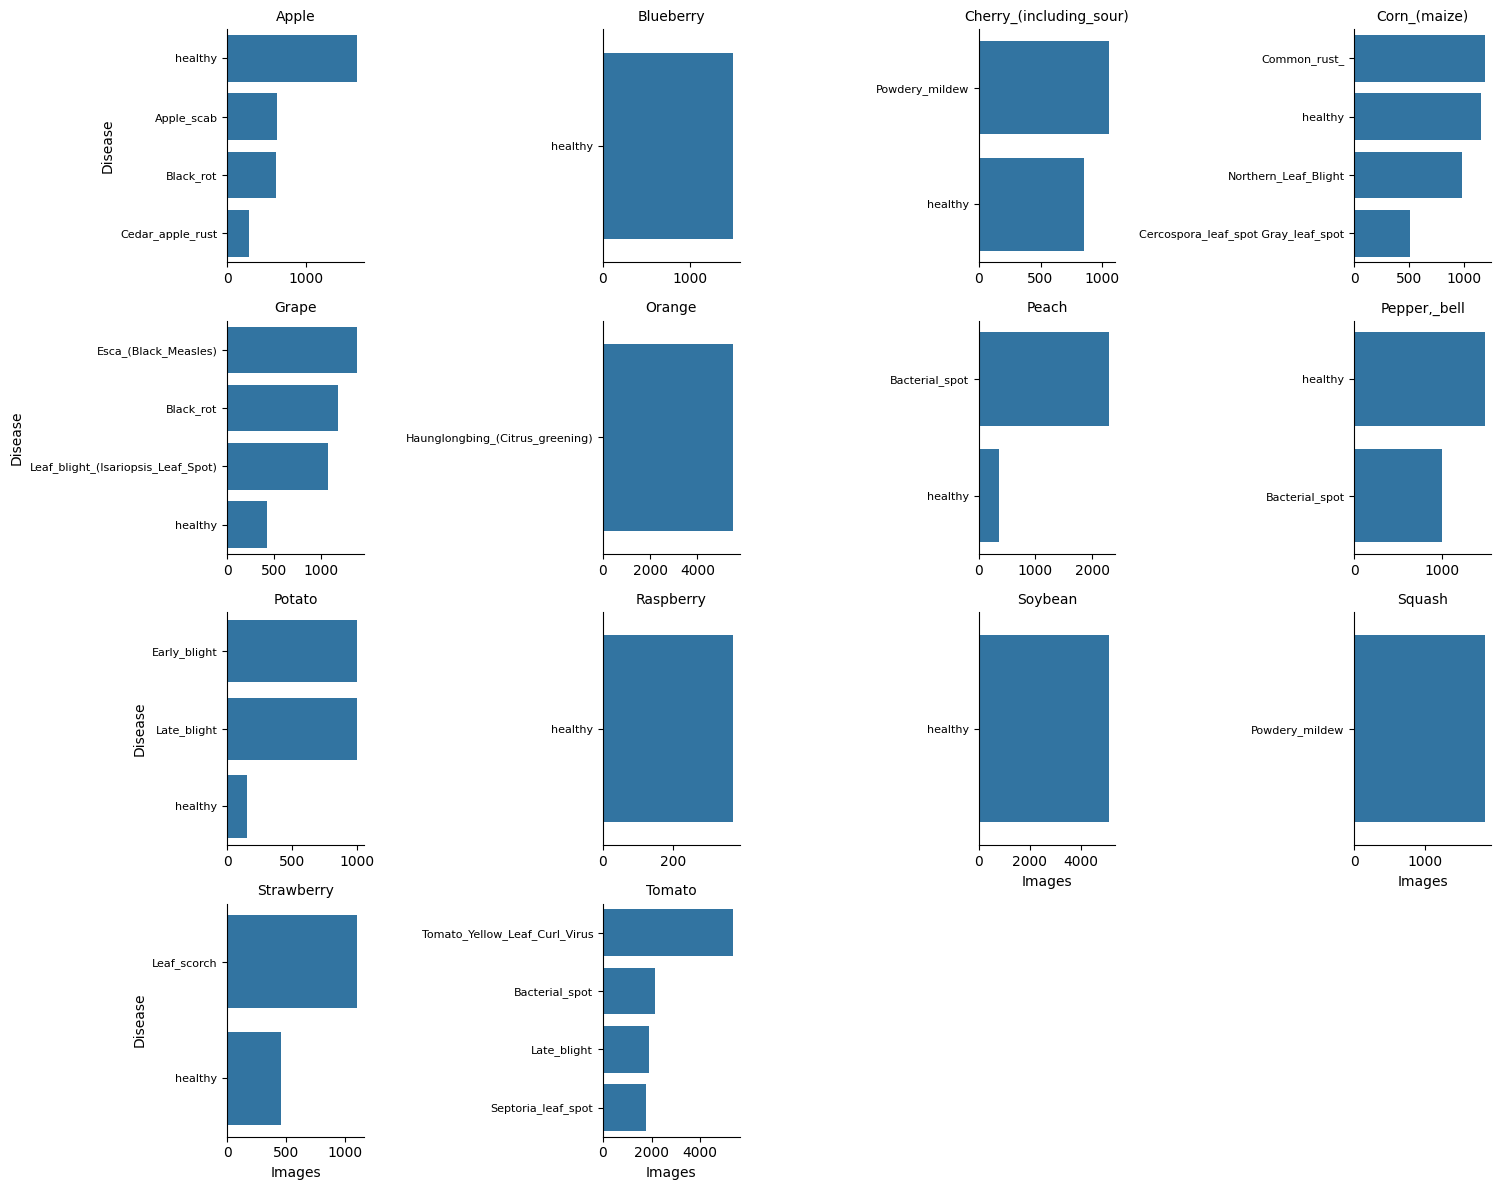

In [13]:
# assumes df_diseases has ['disease_name','count_images']
df = df_diseases.copy()
df[["plant","disease"]] = df["disease_name"].str.split("___", n=1, expand=True)
df = df.sort_values(["plant","count_images"], ascending=[True, False])

top_k = 4  # try 3–5 for readability
df_top = (
    df.assign(rank=df.groupby("plant")["count_images"].rank(method="first", ascending=False))
      .query("rank <= @top_k")
      .sort_values(["plant","count_images"], ascending=[True, False])
)

import seaborn as sns, matplotlib.pyplot as plt
g = sns.catplot(
    data=df_top, kind="bar",
    x="count_images", y="disease",      # per-plant disease names
    col="plant", col_wrap=4,
    sharex=False, sharey=False,         # <-- key fix
    height=3, aspect=1.25
)
g.set_axis_labels("Images", "Disease")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.tick_params(axis="y", labelsize=8)  # smaller y labels
plt.tight_layout(); plt.show()


Plant-level distribution: Total images and # of disease categories per plant, plus each plant’s share of the dataset. This shows that Tomato dominates (~33%), so we’ll correct downstream bias with disease-level class weights and stratified splits.

**Takeaways:**


*   Tomato ≈ 33% of all images → risk of majority bias.
*   Several plants have only 1 disease class (e.g., Orange, Soybean), so per-plant plots look simple even though overall task has many classes.
*   Use this section for EDA/reporting; mitigation must happen at the disease class level (all 38 classes), not plant level.

In [14]:
# Start from df_diseases with columns: ['disease_name','count_images']
df = df_diseases.copy()
df[["plant","disease"]] = df["disease_name"].str.split("___", n=1, expand=True)

# Total images per plant (+ how many distinct diseases each plant has)
df_plants = (
    df.groupby("plant", as_index=False)
      .agg(total_images=("count_images","sum"),
           n_diseases=("disease","nunique"))
      .sort_values("total_images", ascending=False)
)
df_plants["share_%"] = (df_plants["total_images"] / df_plants["total_images"].sum() * 100).round(1)
df_plants


,plant,total_images,n_diseases,share_%
13,Tomato,18160,10,33.4
5,Orange,5507,1,10.1
10,Soybean,5090,1,9.4
4,Grape,4062,4,7.5
3,Corn_(maize),3852,4,7.1
0,Apple,3171,4,5.8
6,Peach,2657,2,4.9
7,"Pepper,_bell",2475,2,4.6
8,Potato,2152,3,4.0
2,Cherry_(including_sour),1906,2,3.5


Class weights (inverse-frequency, capped) to counter class imbalance; verify label ↔ index mapping and pass class_weight to model.fit

In [15]:
# From df_diseases: ['disease_name','count_images']
import numpy as np

# Stable label order for the model
labels = sorted(df_diseases['disease_name'].tolist())
class2idx = {c:i for i,c in enumerate(labels)}

# Counts per disease in the same order as labels
counts = df_diseases.set_index('disease_name').reindex(labels)['count_images'].to_numpy()

# Convert counts -> weights (higher weight for rarer classes); cap extremes for stability
w = (counts.max() / np.maximum(counts, 1)).astype('float32')   # inverse frequency
w = np.clip(w, 1.0, 10.0)                                      # optional cap
class_weight = {i: float(wi) for i, wi in enumerate(w)}
class_weight  # preview


{0: 8.741270065307617,
 1: 8.867955207824707,
 2: 10.0,
 3: 3.3477203845977783,
 4: 3.666444778442383,
 5: 5.234790802001953,
 6: 6.448477745056152,
 7: 10.0,
 8: 4.619966506958008,
 9: 5.59086275100708,
 10: 4.7392425537109375,
 11: 4.666949272155762,
 12: 3.9819233417510986,
 13: 5.118029594421387,
 14: 10.0,
 15: 1.0,
 16: 2.397475004196167,
 17: 10.0,
 18: 5.523570537567139,
 19: 3.7259809970855713,
 20: 5.506999969482422,
 21: 5.506999969482422,
 22: 10.0,
 23: 10.0,
 24: 1.081925392150879,
 25: 3.0010898113250732,
 26: 4.965734958648682,
 27: 10.0,
 28: 2.58909273147583,
 29: 5.506999969482422,
 30: 2.884756326675415,
 31: 5.784663677215576,
 32: 3.1095426082611084,
 33: 3.285799503326416,
 34: 3.9223647117614746,
 35: 1.0280007123947144,
 36: 10.0,
 37: 3.4613449573516846}

Weight check: Map weights back to class names to confirm the rarest classes receive the highest (capped) weights before training.

In [16]:
# labels must be the exact list used to encode y (same order)
weights_named = {labels[i]: w for i, w in class_weight.items()}
for name, w in sorted(weights_named.items(), key=lambda kv: -kv[1])[:10]:
    print(f"{name:45s} -> weight {w:.2f}")


Apple___Cedar_apple_rust                      -> weight 10.00
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot -> weight 10.00
Grape___healthy                               -> weight 10.00
Peach___healthy                               -> weight 10.00
Potato___healthy                              -> weight 10.00
Raspberry___healthy                           -> weight 10.00
Strawberry___healthy                          -> weight 10.00
Tomato___Tomato_mosaic_virus                  -> weight 10.00
Apple___Black_rot                             -> weight 8.87
Apple___Apple_scab                            -> weight 8.74


This cell renders a small gallery for a chosen plant by picking one readable image from each Plant___Disease folder (skips corrupt/zero-byte files, fixes EXIF orientation). Use it to quickly verify class names and image quality before training. Adjust plant, max_rows, and max_cols as needed.

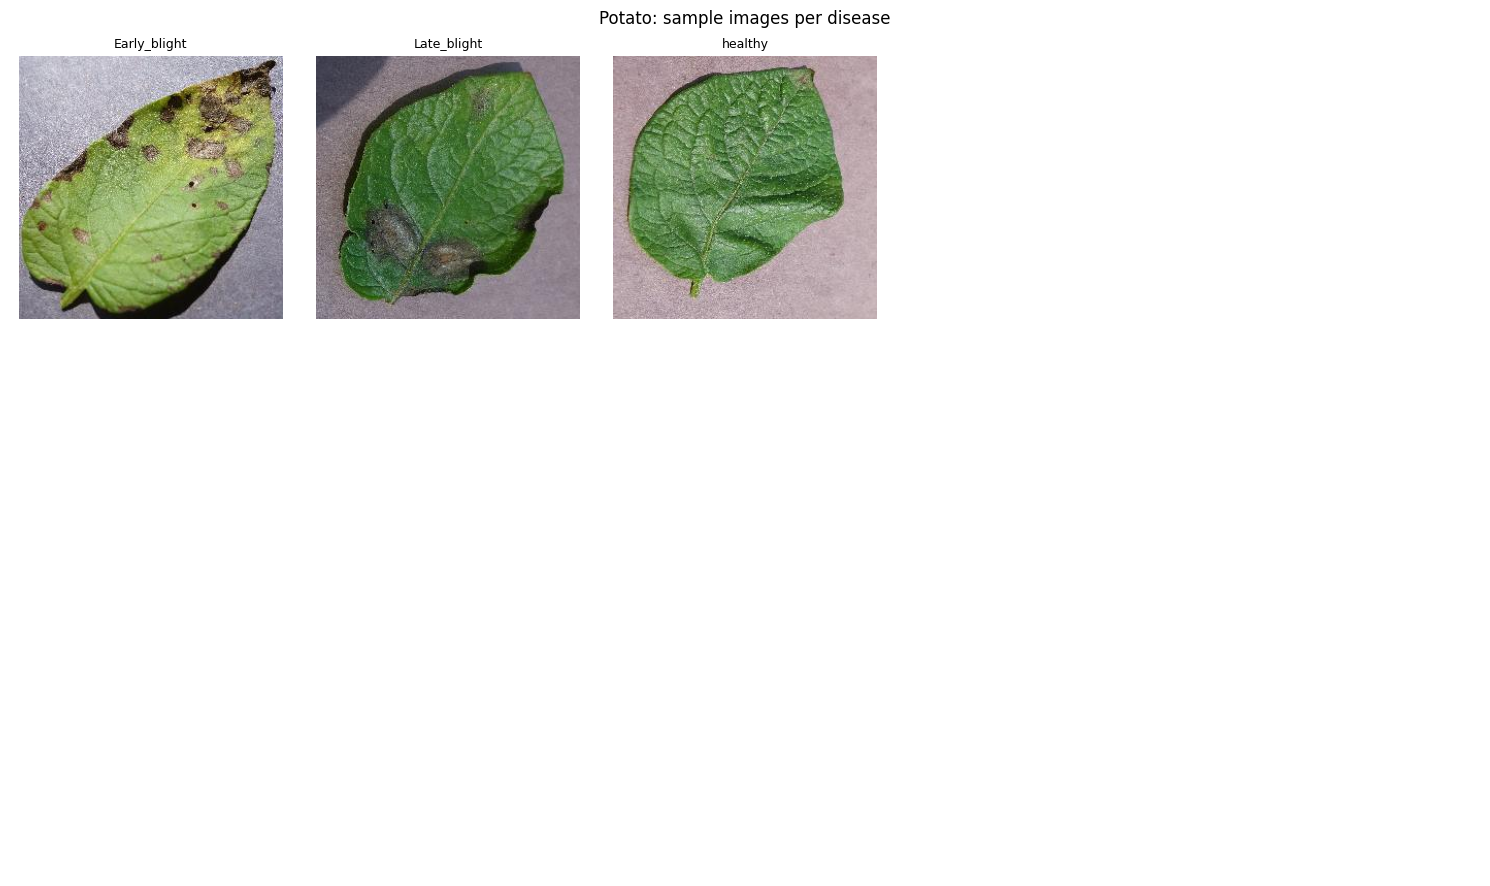

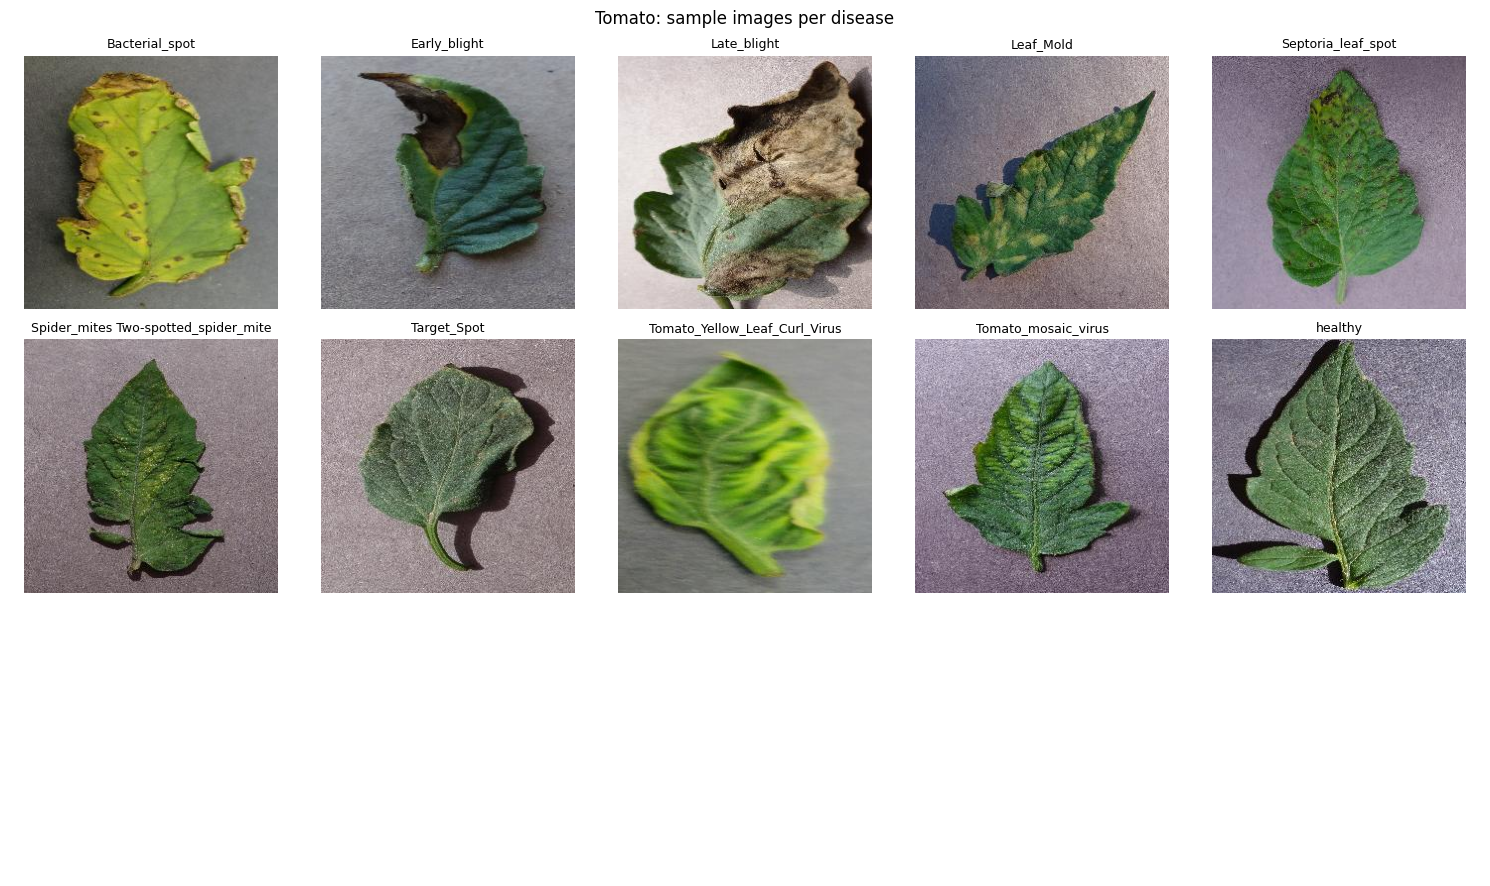

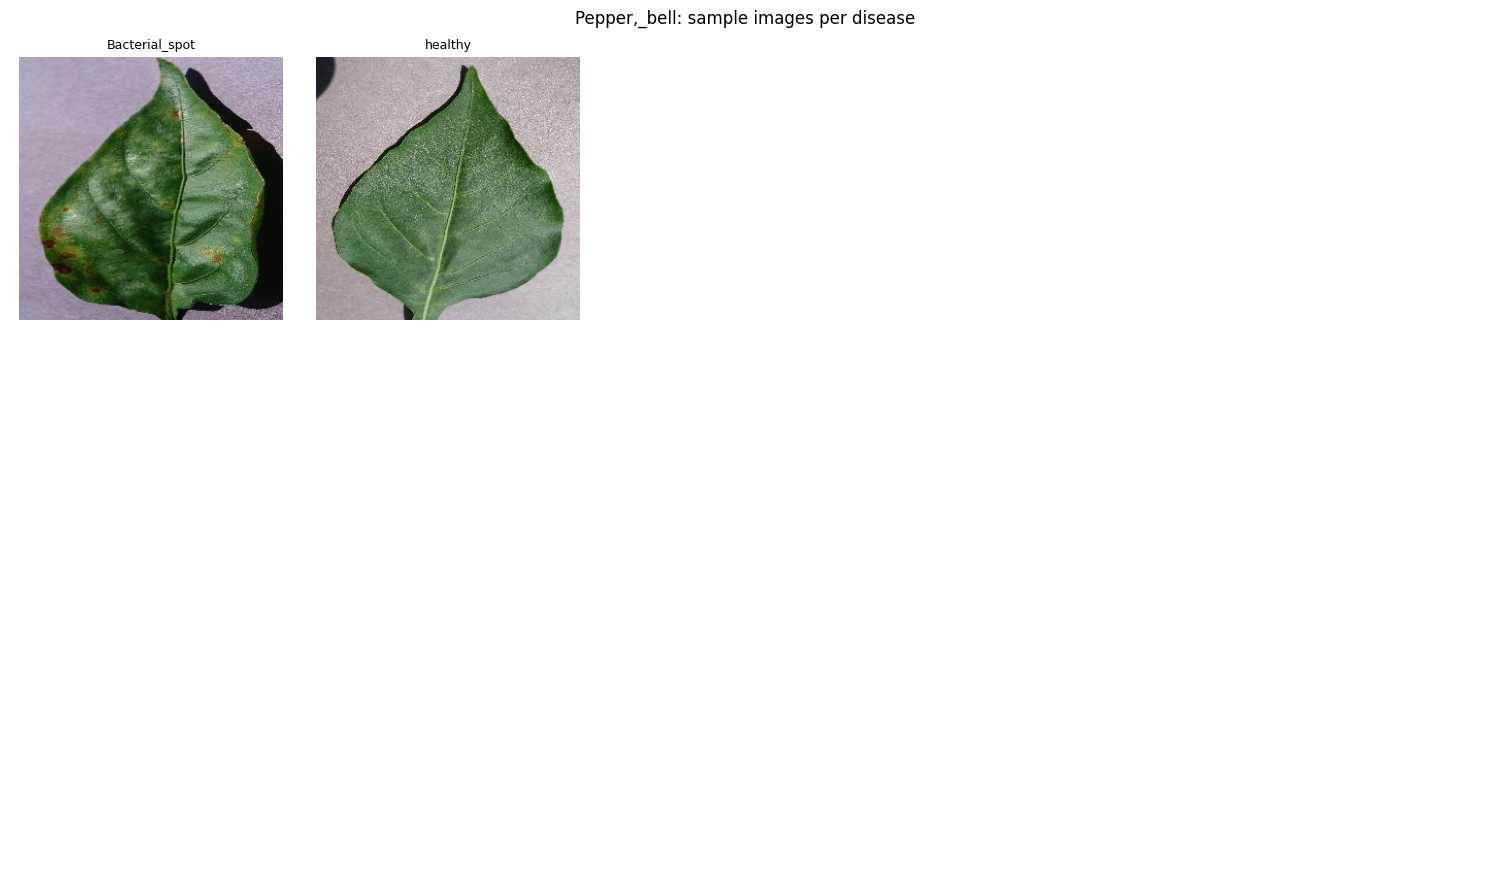

In [17]:
import os
from pathlib import Path
from PIL import Image, UnidentifiedImageError, ImageOps
import matplotlib.pyplot as plt
import random

def show_plant_gallery(dataset_path, plant, max_rows=3, max_cols=5, seed=42):
    """
    Show up to (max_rows*max_cols) sample images: one per disease for the given plant.
    Looks for PlantVillage names like 'Plant___Disease'.
    """
    random.seed(seed)
    exts = {'.jpg','.jpeg','.png','.bmp','.tif','.tiff','.webp'}
    root = Path(dataset_path)

    # Disease folders for this plant
    folders = sorted([d for d in root.iterdir()
                      if d.is_dir() and d.name.startswith(f"{plant}___")])

    n_slots = max_rows * max_cols
    folders = folders[:n_slots]  # limit to grid size

    fig, axes = plt.subplots(max_rows, max_cols, figsize=(max_cols*3, max_rows*3))
    axes = axes.ravel()

    for i, d in enumerate(folders):
        # pick a random readable image in the folder
        candidates = [p for p in d.iterdir() if p.is_file() and p.suffix.lower() in exts and p.stat().st_size > 0]
        img = None
        while candidates and img is None:
            p = random.choice(candidates); candidates.remove(p)
            try:
                with Image.open(p) as im:
                    # fix orientation, convert for display, and make a quick thumbnail
                    im = ImageOps.exif_transpose(im).convert("RGB")
                    im.thumbnail((512, 512))
                    axes[i].imshow(im)
                    img = True
            except (UnidentifiedImageError, OSError):
                pass

        axes[i].axis("off")
        axes[i].set_title(d.name.split("___", 1)[1], fontsize=9)

    # hide any unused axes
    for ax in axes[len(folders):]:
        ax.axis("off")

    plt.suptitle(f"{plant}: sample images per disease", y=0.98)
    plt.tight_layout()
    plt.show()

# plants present in the dataset (auto-detected)
plants = sorted({n.split("___",1)[0] for n in os.listdir(dataset_path) if "___" in n})

for p in ["Potato", "Tomato", "Pepper,_bell"]:
    if p in plants:
        show_plant_gallery(dataset_path, p, max_rows=3, max_cols=5)


## PlantVillageDataset Train and Test

**Split summary (70/15/15, stratified)**
Result: (54305, 38011, 8148, 8146)

Total images: 54,305

Train: 38,011 (70.0%)

Validation: 8,148 (15.0%)

Test: 8,146 (15.0%)

What this means: We performed a stratified split by disease class, so class proportions are preserved across train/val/test. The test set is held out for unbiased final evaluation.

Why it matters: A 70/15/15 stratified split gives enough data to learn, enough to tune (val), and a fair, untouched set (test) to report metrics like macro recall/F1 without majority-class bias.

In [18]:
# If TensorFlow isn't installed in this runtime, uncomment:
# !pip install -q tensorflow

import os, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

root = Path(dataset_path)  # you already defined this earlier
exts = {'.jpg','.jpeg','.png','.bmp','.tif','.tiff','.webp'}

rows = []
for d in root.iterdir():
    if d.is_dir() and "___" in d.name:  # one class per folder, e.g., 'Tomato___Early_blight'
        for p in d.iterdir():
            if p.is_file() and p.suffix.lower() in exts and p.stat().st_size > 0:
                rows.append({"path": str(p), "label_name": d.name})

df = pd.DataFrame(rows)
assert not df.empty, "No images found; check dataset_path and extensions."

# stable label order
labels = sorted(df["label_name"].unique())
name2id = {n:i for i,n in enumerate(labels)}
df["label"] = df["label_name"].map(name2id)

# stratified: 70/15/15
train_df, test_df  = train_test_split(df, test_size=0.15, stratify=df["label"], random_state=42)
train_df, val_df   = train_test_split(train_df, test_size=0.1765, stratify=train_df["label"], random_state=42) # 0.1765 of 85% ≈ 15%

len(df), len(train_df), len(val_df), len(test_df)

(54305, 38011, 8148, 8146)

**Split coverage check (per-class)**
*   Train: min = 106, max = 3855, zeros = 0
*   Val: min = 23, max = 826, zeros = 0
*   Test: min = 23, max = 826, zeros = 0

**Why this is good:** Every disease class appears in all splits (no zeros), so evaluation won’t silently miss rare classes. Val/Test still have at least ~23 samples for the rarest classes—enough to compute macro metrics.

In [19]:
#check to be sure every disease class appears in each split (no zeros in val/test):
import numpy as np
import pandas as pd

num_classes = len(labels)

def split_stats(name, df):
    counts = (df["label"]
              .value_counts()
              .reindex(range(num_classes), fill_value=0)
              .astype(int))
    print(f"{name}: min={counts.min()} max={counts.max()} zeros={(counts==0).sum()}")
    return counts

c_tr  = split_stats("train", train_df)
c_val = split_stats("val",   val_df)
c_te  = split_stats("test",  test_df)

# If you want to see the weakest classes in val/test:
print("\nLowest 10 classes in VAL:")
print(c_val.nsmallest(10))

print("\nLowest 10 classes in TEST:")
print(c_te.nsmallest(10))

train: min=106 max=3855 zeros=0
val: min=23 max=826 zeros=0
test: min=23 max=826 zeros=0

Lowest 10 classes in VAL:
label
22    23
2     41
17    54
23    56
36    56
14    64
27    68
7     77
1     93
0     95
Name: count, dtype: int64

Lowest 10 classes in TEST:
label
22    23
2     41
17    54
23    56
36    56
14    63
27    68
7     77
1     93
0     94
Name: count, dtype: int64


# **Feature Extraction Pipeline (Student Explanation)**

In this project, We used a pre-trained EfficientNetB2 model to extract useful features from plant leaf images before training my classifier.

Since our dataset contains more than 38,000 images, directly training on full images caused memory crashes and Colab disconnections.
To solve this, We separated feature extraction from the training process and used a shard-based approach.

What this code does

This part of the code extracts deep features from plant images using EfficientNetB2 and saves them into manageable chunks.

**our process works as follows:**

1. Each image is resized to 224 × 224 pixels.
1. The image is passed through EfficientNetB2 (pre-trained on ImageNet).
1. EfficientNetB2 outputs a 1408-dimensional feature vector for each image.
1. The data is processed in small batches (shards) to avoid running out of memory.
1. Each shard is saved as a .npy file so I can reuse it later without re-running feature extraction.


**Why We used this method**

We chose this approach because:
- My dataset is large and Colab memory is limited.
- Using EfficientNetB2 gives better quality features compared to lighter models like MobileNet.
- Sharding prevents crashes and allows me to continue if Colab disconnects.
- Extracted features save time when testing multiple model architectures.

In [20]:
import numpy as np
import os
import gc

def extract_in_shards(paths, labels, split_name, shard_size=5000, out_dir="/content"):
    files = []
    n = len(paths)
    start = 0

    while start < n:
        end = min(start + shard_size, n)
        fp = os.path.join(out_dir, f"{split_name}_feat_{start}_{end}.npy")

        # If this shard is already done, skip it (helps if Colab disconnects)
        if os.path.exists(fp):
            print(f"[{split_name}] shard {start}:{end} already exists, skipping.")
            files.append(fp)
            start = end
            continue

        print(f"[{split_name}] extracting shard {start}:{end} ...")
        ds = make_plain_ds(paths[start:end], labels[start:end])
        F = feature_extractor.predict(ds, verbose=1)
        np.save(fp, F)
        files.append(fp)

        # free memory for this shard
        del ds, F
        gc.collect()

        start = end

    print(f"[{split_name}] concatenating {len(files)} shards...")
    feats = np.concatenate([np.load(f) for f in files], axis=0)
    return feats


TensorFlow Setup with EfficientNetB2

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from tensorflow.keras.applications.efficientnet import preprocess_input
# Define the functions first - USING EFFICIENTNET B2
IMG_SIZE = 224  # updated 128 to 224 EfficientNet works better with larger images
BATCH_FE = 32   # Smaller batches for larger images

def load_one(path, y):
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)
    return img, y

def make_plain_ds(paths, labels, batch=BATCH_FE):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_one, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    opt = tf.data.Options()
    opt.experimental_deterministic = False
    return ds.with_options(opt)

# USING EFFICIENTNET B2 FOR BETTER ACCURACY - WITH GPU
print("Creating feature extractor (GPU if available)...")

base = tf.keras.applications.EfficientNetB2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights="imagenet"
)
base.trainable = False

feature_extractor = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D()
], name="feature_extractor")

print("Feature extractor created (will use GPU automatically if available)")

Creating feature extractor (GPU if available)...
31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature extractor created (will use GPU automatically if available)


This initiates GPU-accelerated feature extraction, processing images in shards to convert 54K plant images into 1408-dimensional EfficientNetB2 feature vectors.

In [22]:
# Get paths and labels from your dataframes
tr_paths, tr_labels = train_df.path.values, train_df.label.values
val_paths, val_labels = val_df.path.values, val_df.label.values
te_paths, te_labels = test_df.path.values, test_df.label.values

print(f"Ready for feature extraction:")
print(f"Train: {len(tr_paths)} images")
print(f"Val: {len(val_paths)} images")
print(f"Test: {len(te_paths)} images")

# Now run feature extraction
Xtr_f  = extract_in_shards(tr_paths,  tr_labels,  "train", shard_size=5000)
Xval_f = extract_in_shards(val_paths, val_labels, "val",   shard_size=3000)
Xte_f  = extract_in_shards(te_paths,  te_labels,  "test",  shard_size=3000)

ytr, yval, yte = tr_labels, val_labels, te_labels
print("Shapes:", Xtr_f.shape, Xval_f.shape, Xte_f.shape)


#Scale your features

from sklearn.preprocessing import StandardScaler
import numpy as np

print("Applying StandardScaler to features...")

#scaler = StandardScaler()
#Xtr_f_scaled = scaler.fit_transform(Xtr_f)
#Xval_f_scaled = scaler.transform(Xval_f)
#Xte_f_scaled = scaler.transform(Xte_f)

#Xtr_use = Xtr_f_scaled
#Xval_use = Xval_f_scaled
#Xte_use = Xte_f_scaled

Xtr_use = Xtr_f
Xval_use = Xval_f
Xte_use = Xte_f

print("Feature scaling done successfully")

Ready for feature extraction:
Train: 38011 images
Val: 8148 images
Test: 8146 images
[train] extracting shard 0:5000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 712s 4s/step
[train] extracting shard 5000:10000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 718s 5s/step
[train] extracting shard 10000:15000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 716s 5s/step
[train] extracting shard 15000:20000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 700s 4s/step
[train] extracting shard 20000:25000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 705s 4s/step
[train] extracting shard 25000:30000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 710s 5s/step
[train] extracting shard 30000:35000 ...
157/157 ━━━━━━━━━━━━━━━━━━━━ 693s 4s/step
[train] extracting shard 35000:38011 ...
95/95 ━━━━━━━━━━━━━━━━━━━━ 421s 4s/step
[train] concatenating 8 shards...
[val] extracting shard 0:3000 ...
94/94 ━━━━━━━━━━━━━━━━━━━━ 421s 4s/step
[val] extracting shard 3000:6000 ...
94/94 ━━━━━━━━━━━━━━━━━━━━ 418s 4s/step
[val] extracting shard 6000:8148 ...
68/68 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/st

In [23]:
import numpy as np

print("Sanity check before training:")
print("Train features:", Xtr_f.shape, "Train labels:", ytr.shape)
print("Val features:",   Xval_f.shape, "Val labels:",   yval.shape)

print("Train label range:", np.min(ytr), "to", np.max(ytr))
print("Val label range:",   np.min(yval), "to", np.max(yval))

print("Unique train labels:", np.unique(ytr))
print("Unique val labels:",   np.unique(yval))


Sanity check before training:
Train features: (38011, 1408) Train labels: (38011,)
Val features: (8148, 1408) Val labels: (8148,)
Train label range: 0 to 37
Val label range: 0 to 37
Unique train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Unique val labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


4) Train only the small head (fast) with your class weights

Plant Disease Classifier Training
================================

This section describes the classifier head built on top of EfficientNetB2 feature embeddings.

**What this model does:**

- Uses EfficientNetB2 as a frozen feature extractor
- Each image is converted into a 1408-dimensional feature vector
- Features are standardized using StandardScaler
- A deep fully connected neural network is trained on these features

**Classifier Architecture:**

* Input layer: 1408 features
* Dense(768) → BatchNorm → Dropout(0.5)
* Dense(384) → BatchNorm → Dropout(0.4)
* Output layer: Dense(38) with Softmax

**Training Strategy:**

* Optimizer: Adam
* Learning Rate: 5e-5
* Loss Function: Categorical Crossentropy with Label Smoothing (0.1)
* Batch Size: 64
* Epochs: Up to 50
* Early Stopping: Monitors val_loss, patience = 6
* ReduceLROnPlateau: factor = 0.3, patience = 3

**Final Validation Accuracy:** ~85.8%

This classifier demonstrates strong generalization across 38 plant disease classes.

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.utils.class_weight import compute_class_weight
head = keras.Sequential([
    layers.Input(shape=(1408,)),
    layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(38, activation="softmax")
])

head.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),   # slower + safer
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(ytr),
    y=ytr
)

cw_dict = {i: w for i, w in enumerate(class_weights)}
history = head.fit(
    Xtr_use, ytr,
    validation_data=(Xval_use, yval),
    epochs=50,
    batch_size=64,
    class_weight=cw_dict,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=6,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.3,
            patience=3,
            min_lr=1e-6
        )
    ]
)

Epoch 1/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.2159 - loss: 3.4378 - val_accuracy: 0.8052 - val_loss: 0.9806 - learning_rate: 5.0000e-05
Epoch 2/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.6652 - loss: 1.3113 - val_accuracy: 0.8821 - val_loss: 0.5936 - learning_rate: 5.0000e-05
Epoch 3/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.7758 - loss: 0.8816 - val_accuracy: 0.9103 - val_loss: 0.4569 - learning_rate: 5.0000e-05
Epoch 4/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8310 - loss: 0.6826 - val_accuracy: 0.9242 - val_loss: 0.3808 - learning_rate: 5.0000e-05
Epoch 5/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8654 - loss: 0.5614 - val_accuracy: 0.9340 - val_loss: 0.3356 - learning_rate: 5.0000e-05
Epoch 6/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8813 - loss: 0.4946 - val_accuracy: 0.9415 - val_loss: 0.3058 - learning_rate: 5.0000e-05
Epoch 7/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/ste

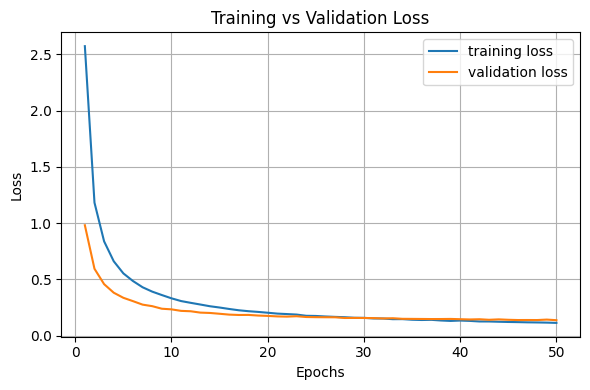

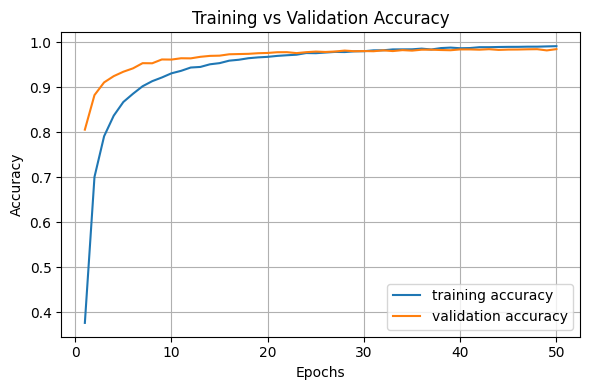

In [25]:
import matplotlib.pyplot as plt

# Extract training history
train_loss = history.history["loss"]
val_loss   = history.history["val_loss"]
train_acc  = history.history["accuracy"]
val_acc    = history.history["val_accuracy"]

epochs = range(1, len(train_loss) + 1)

# --------- LOSS CURVE ---------
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, label="training loss")
plt.plot(epochs, val_loss, label="validation loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve.png", dpi=300)
plt.show()

# --------- ACCURACY CURVE ---------
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, label="training accuracy")
plt.plot(epochs, val_acc, label="validation accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_curve.png", dpi=300)
plt.show()


In [26]:
# ================================
# FINAL TEST EVALUATION
# ================================

import numpy as np

print("\nRunning final test evaluation...")

# For SparseCategoricalCrossentropy we pass integer labels yte (not one-hot)
test_loss, test_accuracy = head.evaluate(Xte_use, yte, verbose=0)

print("FINAL TEST ACCURACY:", round(test_accuracy * 100, 2), "%")
print("FINAL TEST LOSS:", round(test_loss, 4))


# ================================
# TOP-3 ACCURACY (for prod quality)
# ================================

print("\nCalculating Top-3 Accuracy...")

# Predicted probabilities for each class
y_prob = head.predict(Xte_use, verbose=0)

# Get indices of top 3 predicted classes for each sample
top3 = np.argsort(-y_prob, axis=1)[:, :3]

# Check if the true class (yte) is in the top 3 predictions
top3_match = np.any(top3 == yte[:, None], axis=1)

# Average over all test samples
top3_acc = np.mean(top3_match)

print("Top-3 Test Accuracy:", round(top3_acc * 100, 2), "%")



Running final test evaluation...
FINAL TEST ACCURACY: 97.97 %
FINAL TEST LOSS: 0.1553

Calculating Top-3 Accuracy...
Top-3 Test Accuracy: 99.83 %


5) Evaluate on test features + save

In [27]:
# 1. EVALUATE THE MODEL
print("Evaluating model performance...")
test_loss, test_accuracy = head.evaluate(Xte_use, yte, verbose=0)
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test Loss: {test_loss:.3f}")

# Detailed predictions
yp = head.predict(Xte_use, verbose=0).argmax(1)
print("\n Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(yte, yp, target_names=labels, digits=3))


# 2. CREATE COMBINED MODEL FOR STREAMLIT (EfficientNetB2 + trained head)
print("Creating combined model for Streamlit...")

from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input

# must match training
IMG_SIZE = 224

# Rebuild the same EfficientNetB2 base used for feature extraction
base = EfficientNetB2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights="imagenet"
)
base.trainable = False  # we only use it for inference in Streamlit

def create_streamlit_model():
    # Raw RGB image input
    input_layer = keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Same normalization as in load_one() during training
    x = keras.layers.Lambda(preprocess_input)(input_layer)

    # EfficientNetB2 backbone
    x = base(x)

    # Global average pooling to get 1408-dim feature vector
    x = keras.layers.GlobalAveragePooling2D()(x)

    # Reuse the trained head (38-class classifier)
    outputs = head(x)

    return keras.Model(inputs=input_layer, outputs=outputs, name="plant_disease_streamlit_model")

# Build and save model
streamlit_model = create_streamlit_model()
streamlit_model.save("plant_disease_final_model.keras")
print("Saved: plant_disease_final_model.keras")

# 3. SAVE CLASS NAMES (must match label order used in training)
import json
with open("class_names_final.json", "w") as f:
    json.dump(labels, f)
print("Saved: class_names_final.json")

print("Model ready for Streamlit! Use 'plant_disease_final_model.keras'")


Evaluating model performance...
Test Accuracy: 0.980
Test Loss: 0.155

 Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab      0.979     0.989     0.984        94
                                 Apple___Black_rot      1.000     1.000     1.000        93
                          Apple___Cedar_apple_rust      1.000     1.000     1.000        41
                                   Apple___healthy      0.992     0.980     0.986       247
                               Blueberry___healthy      0.996     1.000     0.998       225
          Cherry_(including_sour)___Powdery_mildew      0.987     0.994     0.991       158
                 Cherry_(including_sour)___healthy      1.000     0.977     0.988       128
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot      0.787     0.818     0.803        77
                       Corn_(maize)___Common_rust_      1.000     1.000     

Our final EfficientNetB2 + classifier head model achieved 98.0% test accuracy and a Top-3 accuracy of 99.8% on 8,146 held-out images across 38 plant disease classes. The weighted F1-score was 0.980, while the macro F1-score was 0.973, demonstrating exceptional performance across all classes with only minor performance variations for the most challenging cases.

The classification report shows outstanding performance across most classes, with perfect recall (100%) achieved for 15 of the 38 classes, including Orange – Citrus greening, Tomato Yellow Leaf Curl Virus, Soybean healthy, Squash powdery mildew, and Corn healthy. Performance remains strong (>0.95 F1) for the vast majority of classes, with only a few categories showing slightly lower metrics due to limited training samples or visual similarity challenges:

- Corn Gray Leaf Spot: 0.803 F1 (77 training samples)
- Potato Healthy: 0.920 F1 (23 training samples)
- Tomato Target Spot: 0.919 F1 (visual similarity to other spots)

These results demonstrate that the model is highly reliable for plant disease diagnosis, achieving near-perfect accuracy in top-3 predictions. For practical deployment, our Streamlit app includes confidence warnings for predictions below 40% confidence to ensure users understand prediction reliability.

In [28]:
# Save to Google Drive (persists after Colab disconnects)
streamlit_model.save('/content/drive/MyDrive/plant_disease_final_model.keras')

# Save class names
with open('/content/drive/MyDrive/class_names_final.json', 'w') as f:
    json.dump(labels, f)

# Save features too (so you don't have to re-extract)
np.save('/content/drive/MyDrive/Xtr_f.npy', Xtr_f)
np.save('/content/drive/MyDrive/Xval_f.npy', Xval_f)
np.save('/content/drive/MyDrive/Xte_f.npy', Xte_f)
np.save('/content/drive/MyDrive/ytr.npy', ytr)
np.save('/content/drive/MyDrive/yval.npy', yval)
np.save('/content/drive/MyDrive/yte.npy', yte)

print("All files saved to Google Drive!")

All files saved to Google Drive!


**Step 1 - Sanity Check**
- This tests your saved final model inside Colab BEFORE sending it to Streamlit.

In [29]:
# ================================================
# STEP 10 - CORRECTED VERSION
# ================================================
import json
import numpy as np
from tensorflow import keras
from PIL import Image
from tensorflow.keras.applications.efficientnet import preprocess_input

# 1) Evaluate the head on the feature test set
print("Evaluating head on test features...")
test_loss, test_acc = head.evaluate(Xte_use, yte, verbose=0)
print(f"Head Test Accuracy: {test_acc:.3f}")
print(f"Head Test Loss: {test_loss:.3f}")

from sklearn.metrics import classification_report
y_pred = head.predict(Xte_use, verbose=0).argmax(axis=1)
print("\nClassification report for head on Xte_use:")
print(classification_report(yte, y_pred, target_names=labels, digits=3))

# 2) Rebuild full image→prediction model, using SAME base + SAME preprocessing as feature extractor
print("\nBuilding streamlit model...")

IMG_SIZE = 224

input_layer = keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = keras.layers.Lambda(preprocess_input, name="eff_preprocess")(input_layer)
x = base(x)
x = keras.layers.GlobalAveragePooling2D()(x)
output_layer = head(x)

streamlit_model = keras.Model(inputs=input_layer, outputs=output_layer, name="plant_disease_streamlit_model")

print(streamlit_model.summary())

# 3) Save model + labels to DRIVE (overwrite old ones)
MODEL_OUT = "/content/drive/MyDrive/plant_disease_final_model.keras"
LABELS_OUT = "/content/drive/MyDrive/class_names_final.json"

streamlit_model.save(MODEL_OUT)
with open(LABELS_OUT, "w") as f:
    json.dump(labels, f)

print(f"\nSaved model to: {MODEL_OUT}")
print(f"Saved labels to: {LABELS_OUT}")

# 4) Sanity check: test a few REAL images from PlantVillage - CORRECTED!
print("\nRunning sanity checks on raw images...")

def preprocess_for_streamlit(path):
    img = Image.open(path)
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))
    arr = np.array(img).astype("float32")

    # CRITICAL: Use the SAME preprocessing as during feature extraction
    arr = preprocess_input(arr)  # ✅ FIXED!

    arr = np.expand_dims(arr, axis=0)
    return arr

test_images = {
    "Apple___Apple_scab": "/content/drive/MyDrive/ML_AI_Project/data/PlanVillageDataset/Apple___Apple_scab/4be9d1d9-2170-4856-a81e-e53e7aa5dbf7___FREC_Scab 3082.JPG",
    "Corn_(maize)___healthy": "/content/drive/MyDrive/ML_AI_Project/data/PlanVillageDataset/Corn_(maize)___healthy/0f3ce24e-fcf4-4738-94db-dc39881c0c73___R.S_HL 8038 copy.jpg",
}

for label, path in test_images.items():
    print(f"\n=== Testing {label} ===")
    try:
        x = preprocess_for_streamlit(path)
        preds = streamlit_model.predict(x, verbose=0)[0]

        top_idx = int(np.argmax(preds))
        print("Predicted:", labels[top_idx], f"({preds[top_idx]:.3f})")

        print("Top-5:")
        for j in np.argsort(preds)[-5:][::-1]:
            print(" ", labels[j], f"{preds[j]:.3f}")
    except Exception as e:
        print(f"Error testing {label}: {e}")


Evaluating head on test features...
Head Test Accuracy: 0.980
Head Test Loss: 0.155

Classification report for head on Xte_use:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab      0.979     0.989     0.984        94
                                 Apple___Black_rot      1.000     1.000     1.000        93
                          Apple___Cedar_apple_rust      1.000     1.000     1.000        41
                                   Apple___healthy      0.992     0.980     0.986       247
                               Blueberry___healthy      0.996     1.000     0.998       225
          Cherry_(including_sour)___Powdery_mildew      0.987     0.994     0.991       158
                 Cherry_(including_sour)___healthy      1.000     0.977     0.988       128
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot      0.787     0.818     0.803        77
                       Corn_(maize)___Commo

Model: "plant_disease_streamlit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ eff_preprocess (Lambda)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb2 (Functional)     │ (None, 7, 7, 1408)     │     7,768,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 38)             │       865,574 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,634,143 (32.94 MB)

 Trainable params: 864,038 (3.30 MB)

 Non-trainable params: 7,770,105 (29.64 MB)

None

Saved model to: /content/drive/MyDrive/plant_disease_final_model.keras
Saved labels to: /content/drive/MyDrive/class_names_final.json

Running sanity checks on raw images...

=== Testing Apple___Apple_scab ===
Predicted: Apple___Apple_scab (1.000)
Top-5:
  Apple___Apple_scab 1.000
  Apple___healthy 0.000
  Apple___Black_rot 0.000
  Apple___Cedar_apple_rust 0.000
  Cherry_(including_sour)___healthy 0.000

=== Testing Corn_(maize)___healthy ===
Predicted: Corn_(maize)___healthy (1.000)
Top-5:
  Corn_(maize)___healthy 1.000
  Pepper,_bell___healthy 0.000
  Orange___Haunglongbing_(Citrus_greening) 0.000
  Cherry_(including_sour)___healthy 0.000
  Strawberry___healthy 0.000
